## Predicting Heart Disease using Machine Learning

### This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

What is classification?
Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.


6 Step Machine Learning Modelling Framework
More specifically, we'll look at the following topics.

* Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
* Model training - create model(s) to learn to predict a target variable based on other variables.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison - comparing several different models to find the best one.
* Model fine-tuning - once we've found a good model, how can we improve it?
* Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
* Reporting what we've found - if we had to present our work, what would we show someone?
* To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.


### Tools which can be used for each step of the machine learning modelling process.
We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

### 1. Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

### 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

### 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
* can range from mild symptoms to severe problems
* signals non-normal heart beat
* 2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* looks at stress of heart during excercise
* unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)
* thal - thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)
* Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

Preparing the tools
At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

pandas for data analysis.
NumPy for numerical operations.
Matplotlib/seaborn for plotting or data visualization.
Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# We want our plots to appear in our notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset we are working with.

1. What questions we are trying to solve?
2. What kind of data do we have and how we treat different types?
3. What's missing from the data and how we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add/change/remove features to get more out of our data?

In [3]:
# Get info how many of each class there
df["target"].value_counts() # That is balanced classification problem

1    165
0    138
Name: target, dtype: int64

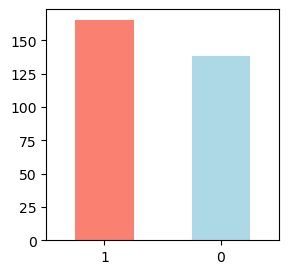

In [4]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], rot=0, figsize=(3,3));

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Crosstab = Compute a simple cross tabulation of two (or more) factors.
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


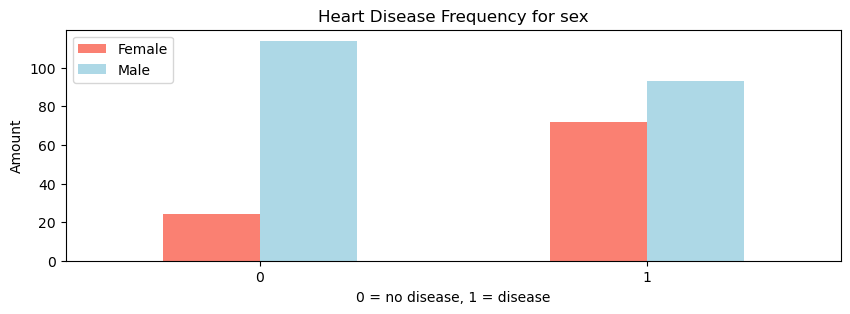

In [9]:
# Create plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", rot=0, figsize=(10, 3), color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

In [10]:
# Compare age, thalach and target all in one
pd.crosstab([df["thalach"], df["age"]], df["target"])

,target,0,1
thalach,age,,
71,67,1,0
88,57,1,0
90,59,1,0
95,53,1,0
96,60,0,1
...,...,...,...
190,52,0,1
192,34,0,1
194,42,0,1


C:\Users\krzys\AppData\Local\Temp\ipykernel_12416\385480391.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df["age"][df["target"] == 1], df["thalach"][df["target"] == 1], c="salmon", cmap=df["target"])
C:\Users\krzys\AppData\Local\Temp\ipykernel_12416\385480391.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] == 0], c="lightblue", cmap=df["target"])


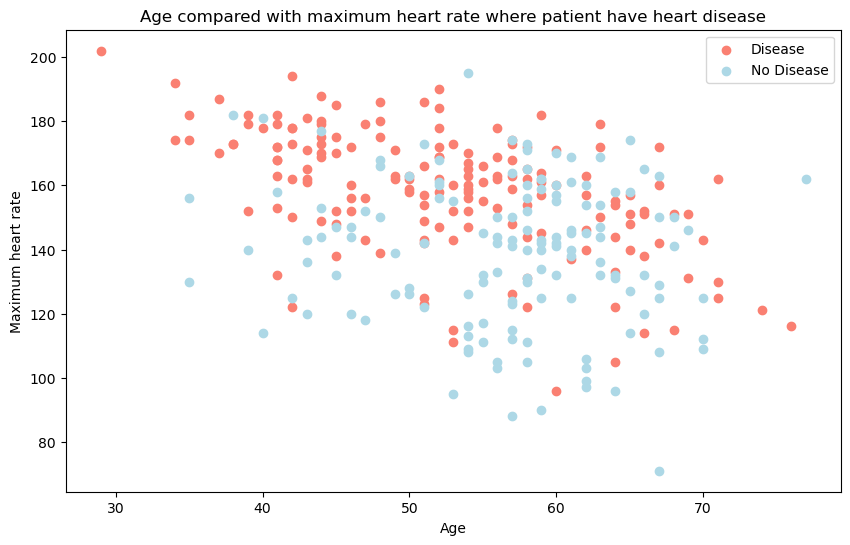

In [11]:
# Create another figure
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
ax.scatter(df["age"][df["target"] == 1], df["thalach"][df["target"] == 1], c="salmon", cmap=df["target"])

# Scatter with negative examples
ax.scatter(df["age"][df["target"] == 0], df["thalach"][df["target"] == 0], c="lightblue", cmap=df["target"])

ax.set(title="Age compared with maximum heart rate where patient have heart disease", 
       xlabel="Age", 
       ylabel="Maximum heart rate"
      );
ax.legend(["Disease", "No Disease"]);

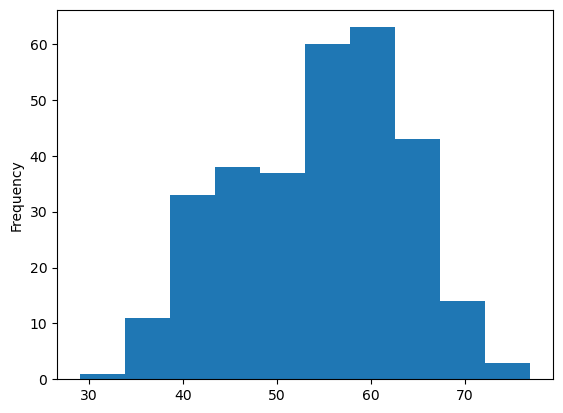

In [12]:
# Check the distribution of the age column using histogram
df["age"].plot(kind="hist");

In [13]:
### Definition of normal distribution (figure above) = 

### Heart disease frequency per chest pain type
cp - chest pain type:

0. Typical angina: chest pain related decrease blood supply to the heart
1. Atypical angina: chest pain not related to heart
2. Non-anginal pain: typically esophageal spasms (non heart related)
3. Asymptomatic: chest pain not showing signs of disease

In [14]:
chest_pain_cross = pd.crosstab(df["cp"], df["target"])
chest_pain_cross

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


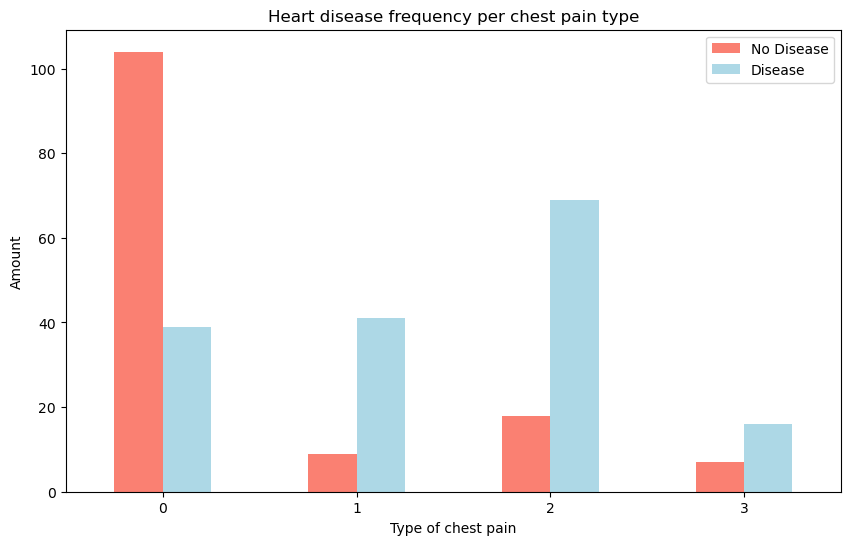

In [15]:
# Create bar plot
chest_pain_cross.plot(kind="bar", rot=0, color=["salmon", "lightblue"], figsize=(10, 6));

plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Type of chest pain")
plt.ylabel("Amount")

plt.legend(["No Disease","Disease"]);

### Corelation matrix = tells us how each independent variable is related to others

In [16]:
# pairwase corelation = compare each column to each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

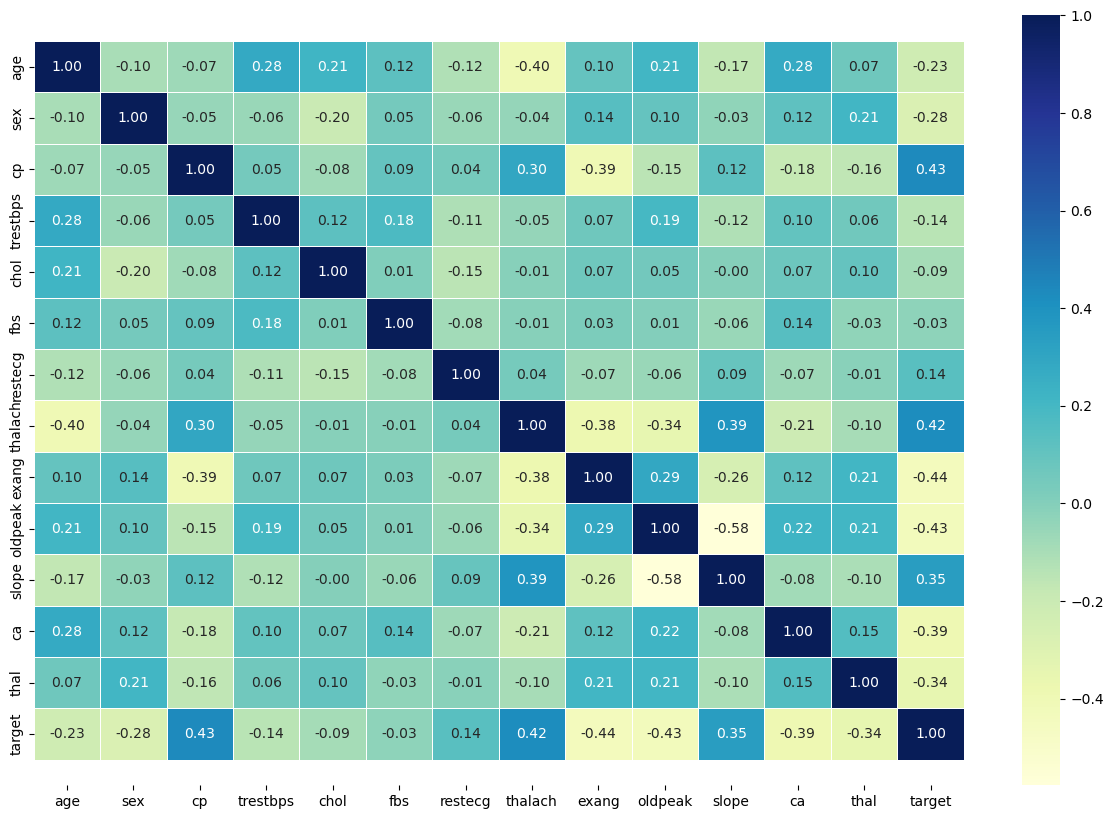

In [17]:
# Let's make corelation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(data=corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

bottom,  top = ax.get_ylim()
ax.set_ylim([bottom + 0.5, top - 0.5])

## 5. Modelling

In [18]:
# Split data into X (features) and y (labels)
X, y = df.drop(columns=["target"]), df["target"]

np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

X_train.shape, X_test.shape, y_test.shape

((242, 13), (61, 13), (61,))

In [19]:
# Now we can try different ML models. We will try KNN, RandomForestClassifier, LogisitcRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs')
}

In [20]:
# Now loop thorugh each model and get it's accuracy using cross validation

def fit_and_score_models(models,  X, y):
    models_scores = {}
    np.random.seed(42)

    for model_name, model in models.items():

        accuracy = np.mean(cross_val_score(estimator=model, X=X, y=y, cv=5))
        models_scores[model_name] = accuracy

    return models_scores

In [21]:
models_scores_results = fit_and_score_models(models, X, y)
models_scores_results

{'RandomForestClassifier': 0.8248087431693989,
 'KNN Classifier': 0.643879781420765,
 'Logistic Regression': 0.8282513661202187}

## Models comparison

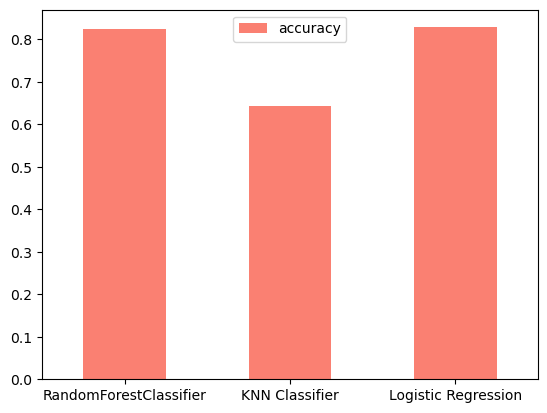

In [22]:
df_models = pd.DataFrame(models_scores_results, index=["accuracy"])
df_models.T.plot(kind="bar", color=["salmon"], rot=0);

### Based on our observations = we are going to use Logistic Regression for heart disease problem

What we are going to do now:

1. Hyperparameters tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. Precision score
6. Recall score
7. F1 score
8. Classification report
9. ROC and AUC (Receiver operating characteristics and area under the curve)

# Hyperparameter tuning

In [23]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a grid for different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    # We can use set_params() to set hyperparameters for our model
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Updata training scores list
    train_scores.append(knn.score(X_train,  y_train))
    
    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [24]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on test data 75.41%


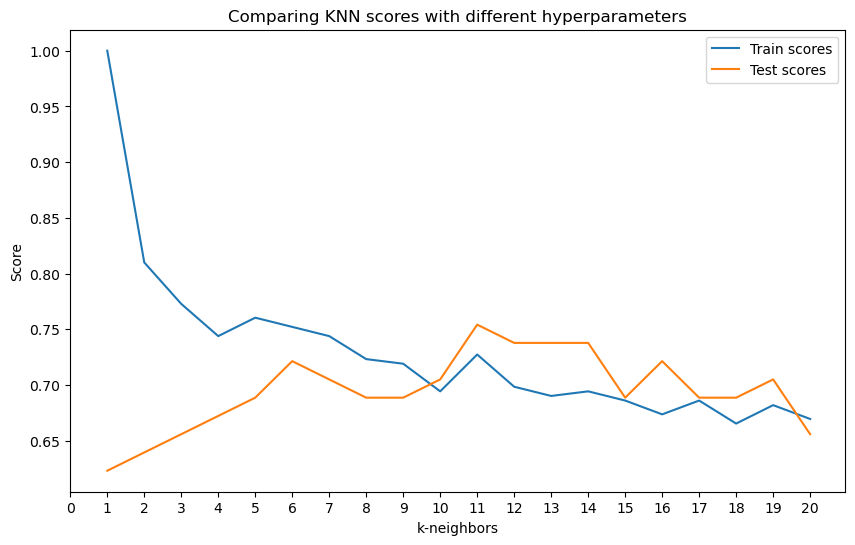

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

x_values = np.arange(1, 21, 1)
y1_values = train_scores
y2_values = test_scores

ax.plot(x_values, y1_values);
ax.plot(x_values, y2_values);

# Set how spread our values are on X-axis
plt.xticks(np.arange(0, 21, 1))

ax.set(title="Comparing KNN scores with different hyperparameters",
      xlabel="k-neighbors",
      ylabel="Score");

ax.legend(["Train scores", "Test scores"]);

print(f"Maximum KNN score on test data {max(y2_values)*100:.2f}%")

In [26]:
# Create function that will show us different evaluation metrics
def evaluate_classification_models(y_true, y_preds):
    """
    Returns disctionary with different evaluation metrics
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metrics = {
        "Accuracy Score": round(accuracy,3),
        "Precision Score": round(precision, 3),
        "Recall Score": round(recall, 3),
        "F1 Score": round(f1, 3)
    }
    
    return metrics

## Hypermarameter tuning with RandomizedSearchCV

We are going to tune:
* Logisitc Regression 
* Random Forest Classifier

In [27]:
# Create hypermarameter grid for logistic regression
log_reg_grid = {
    "penalty" : ['l1', 'l2'],
    "C" : np.logspace(-4, 4, 20),
    "solver" : ['liblinear'],
}

# Create hypermarameter grid for Random Forest Classifier
rf_grid = {
     'bootstrap': [True, False],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
     'max_features': ['sqrt'],
     'min_samples_leaf': np.arange(1, 20, 5),
     'min_samples_split': [2, 5, 10, 20],
     'n_estimators': [200, 400, 600, 800, 1000, 1200]
}

**Now we have our hyperparameters grid setup**

In [28]:
# Tune logistic regression
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(), 
    param_distributions=log_reg_grid, 
    n_iter=20, 
    cv=5, 
    verbose=True
)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [30]:
y_preds = rs_log_reg.predict(X_test)
print(evaluate_classification_models(y_test, y_preds))

{'Accuracy Score': 0.885, 'Precision Score': 0.879, 'Recall Score': 0.906, 'F1 Score': 0.892}


In [31]:
# Tune random forest classifier
np.random.seed(42)

# Setup random hyperparameter search for random forest classifier
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(), 
    param_distributions=rf_grid, 
    n_iter=20, 
    cv=5, 
    verbose=2
)

# Fit our model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1000; total time=   1.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estima

[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=16, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': array([ 1,  6, 11, 16]),
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   verbose=2)

In [37]:
rs_rf.best_params_

{'n_estimators': 600,
 'min_samples_split': 20,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [38]:
# Make predictions and score our model
y_preds = rs_rf.predict(X_test)
print(evaluate_classification_models(y_test, y_preds))

{'Accuracy Score': 0.869, 'Precision Score': 0.853, 'Recall Score': 0.906, 'F1 Score': 0.879}


In [39]:
# Create new hypermarameter grid for logistic regression
log_reg_grid = {
    "C" : np.logspace(-4, 4, 30),
    "solver" : ['liblinear'],
}

# Create new hypermarameter grid for Random Forest Classifier
rf_grid = {
     'bootstrap': [True],
     'max_depth': [90, 100],
     'max_features': ['sqrt'],
     'min_samples_leaf': [16, 20],
     'min_samples_split': [20],
     'n_estimators': [600, 800, 1000, 1200]
}

## Now perform exhaustive GridSearchCV

In [40]:
# GridSearchCV for loigistic regression

# Setup random seed
np.random.seed(42)

gs_log_reg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
y_preds = gs_log_reg.predict(X_test)
log_reg_metrics = evaluate_classification_models(y_test, y_preds)
print(log_reg_metrics)

{'Accuracy Score': 0.885, 'Precision Score': 0.879, 'Recall Score': 0.906, 'F1 Score': 0.892}


In [43]:
# GridSearchCV for Random Forest Classifier

# Setup random seed
np.random.seed(42)

# Create grid model
gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_grid,
    cv=5,
    verbose=2
)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimato

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=16, min_samples_split=20, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [90, 100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [16, 20],
                         'min_samples_split': [20],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

In [45]:
gs_rf.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 16,
 'min_samples_split': 20,
 'n_estimators': 800}

In [46]:
# Evaluate our random forest classifier model
y_preds = gs_rf.predict(X_test)
rf_metrics = evaluate_classification_models(y_test, y_preds)
print(rf_metrics)

{'Accuracy Score': 0.869, 'Precision Score': 0.853, 'Recall Score': 0.906, 'F1 Score': 0.879}


In [47]:
summary = pd.DataFrame(rf_metrics, index=["Random Forest metrics"]).T
summary["Logistic Regression metrics"] = log_reg_metrics
summary

,Random Forest metrics,Logistic Regression metrics
Accuracy Score,0.869,0.885
Precision Score,0.853,0.879
Recall Score,0.906,0.906
F1 Score,0.879,0.892


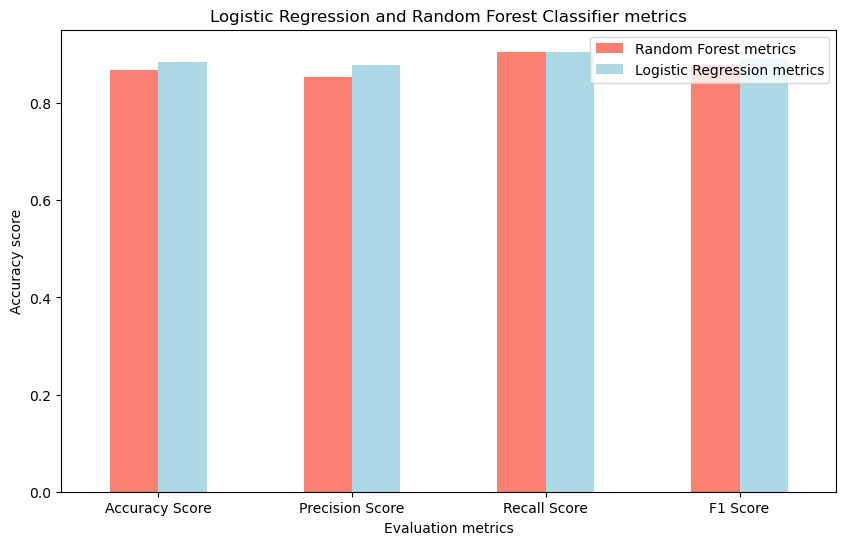

In [48]:
summary.plot(kind="bar", rot=0, figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Logistic Regression and Random Forest Classifier metrics")
plt.xlabel("Evaluation metrics")
plt.ylabel("Accuracy score");

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_log_reg_preds_proba = gs_log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_log_reg_preds_proba)

AUCScore = roc_auc_score(y_test, y_log_reg_preds_proba)

In [50]:
# Plot ROC curve and calculate AUC metric
def create_roc_curve(fpr, tpr, AUC_score):
    """
    Create visualization of roc curve figure
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot our figures
    ax.plot(fpr, tpr, c="salmon")
    ax.plot([0,1], linestyle='dashed')
    
    # Create string for labels and title
    ax.set(
        title="Visualization of ROC",
        xlabel="False Positive Rate",
        ylabel="True Positive Rate"
    )
    
    # Show legend
    ax.legend([f"Area under the curve (AUC = {round(AUC_score, 3)})"])

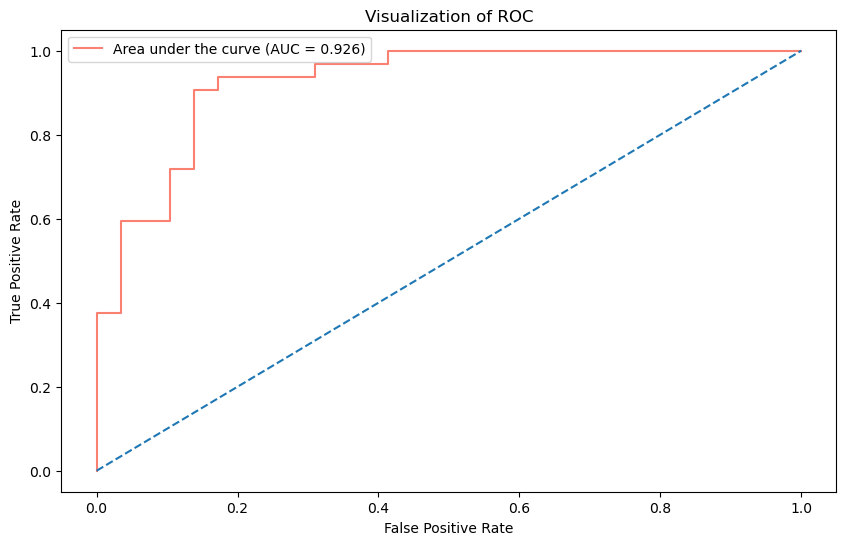

In [51]:
create_roc_curve(fpr, tpr, AUCScore)

In [52]:
# Create confusion matrix for our logistic regression model
y_log_reg_preds = gs_log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_log_reg_preds))

,0,1
0,25,4
1,3,29


In [53]:
# Visualize it with seaborn heatmap
sns.set(font_scale=1.15)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize=(5,5))
    
    # Create seaborn heatmap
    ax = sns.heatmap(
        data=confusion_matrix(y_test, y_preds),
        annot=True,
        fmt=".0f"
    )
    
    ax.set(
        title="Confusion Matrix Visualized",
        xlabel="Model Predictions",
        ylabel="True Labels"
    )
    
    plt.show()

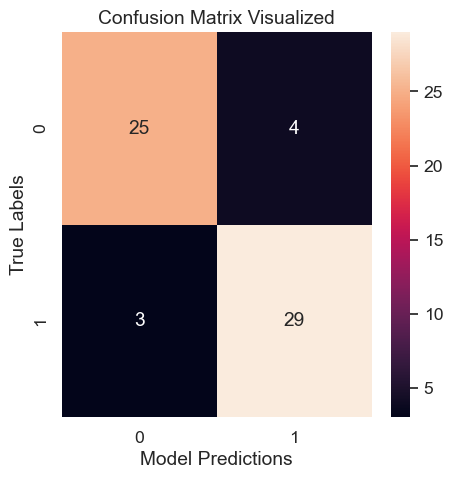

In [54]:
plot_conf_mat(y_test, y_log_reg_preds)

**Now we can get classification report**

In [55]:
print(classification_report(y_test, y_log_reg_preds)) 
# All of these metrics are calculated only on 1 split.
# We want to calclate them on multiple splits using cross-validation

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [56]:
# Calculate evaluation metrics using cross-validation-score

In [57]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# Create new classifier with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')

In [59]:
# Cross validated accuracy
cv_acc = np.mean(cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring="accuracy"))

# Cross validated precision
cv_precision = np.mean(cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring="precision"))

# Cross validated recall
cv_recall = np.mean(cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring="recall"))

# Cross validated f1
cv_f1 = np.mean(cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring="f1"))

metrics_log_rg = [cv_acc, cv_precision, cv_recall, cv_f1]

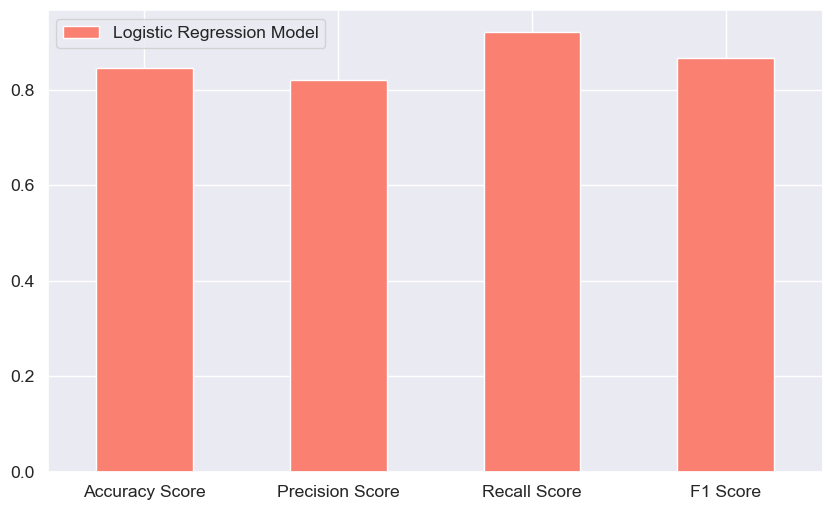

In [60]:
# Visualize our evaluation metrics for Ligistic Regression model
metrics_log_rg_df = pd.DataFrame(
    metrics_log_rg, 
    columns=["Logistic Regression Model"], 
    index=["Accuracy Score", "Precision Score", "Recall Score", "F1 Score"])
# We can also pass simple dictionary to our dataFrame like : {"Accuracy score": 0.923213, "Precision Score": ...}

metrics_log_rg_df.plot(kind="bar", color="salmon", rot=0, figsize=(10, 6));

### Feature Importance 

**It is another way of asking: which features contributed most to the outcomes of the model**

Finding feature importance is different for each machine learning model. The best way to search for feature importance is just to search for it in browser.

In [61]:
# Fit an instance of logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_, X.shape, len(clf.coef_[0])

(array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
          0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
          0.45051628, -0.63609898, -0.67663373]]),
 (303, 13),
 13)

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

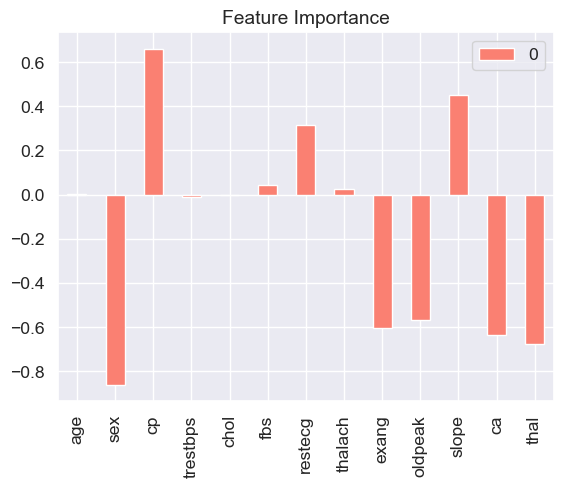

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df = feature_df.T
feature_df.plot(kind="bar", color="salmon")

plt.title("Feature Importance"); 
# This shows us how much each feature contributes (przyczyniać się) to predicting target variable.

* Negative corelation = when 1 value increases the other one decreases
* Positive corelation = when 1 value increases the other one increases, or both decrease

In [66]:
pd.crosstab(index=df["sex"], columns=df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
pd.crosstab(index=df["slope"], columns=df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Model Persistence

**If our model is good enough (we hit our evaluation metrics) we can export it**

In [68]:
from joblib import load, dump

dump(clf, filename="heart-disease-model.joblib")

['heart-disease-model.joblib']

In [69]:
loaded_model = load(filename="heart-disease-model.joblib")
y_preds = loaded_model.predict(X_test)
print(evaluate_classification_models(y_test, y_preds))

{'Accuracy Score': 0.885, 'Precision Score': 0.879, 'Recall Score': 0.906, 'F1 Score': 0.892}
